# Logistic Regression

## Contexto:

Neste problema, crio um modelo de classifacação que prevê qual pessoa possui alguma doença cardíaca baseado no resultado de um exame físico e outras características da pessoa (idade, sexo, nível de colesterol, etc).

---
---
---
## Importando bibliotecas

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data

O dataset original pode ser visto aqui --> [archive.ics.uci.edu](https://archive.ics.uci.edu/ml/datasets/Heart+Disease).

Resumo das informações:

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target: 0 (se não possui doença cardíaca), 1 (se possui doença cardíaca)

Crédito aos Autores:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.

University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.

University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.

V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

In [7]:
df = pd.read_csv('heart.csv')

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df['target'].unique()

array([1, 0])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Visualizando o número total de pessoas com e sem doença cardíaca.**

<AxesSubplot:xlabel='target', ylabel='count'>

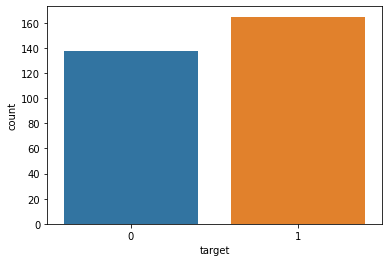

In [13]:
sns.countplot(x="target", data=df)

**Heatmap mostrando a correlação entre todas as colunas:**

<AxesSubplot:>

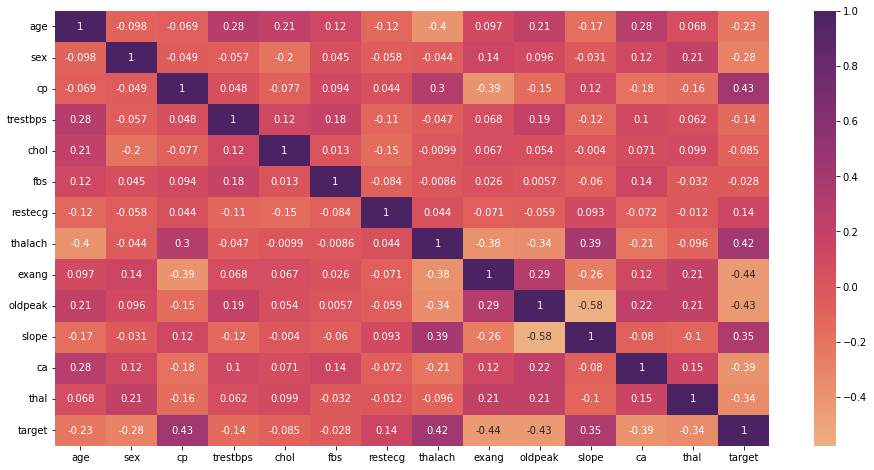

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(df.corr(), cmap="flare", annot=True)

**Mostrando a relação entre as features:** ['age','trestbps', 'chol','thalach','target']

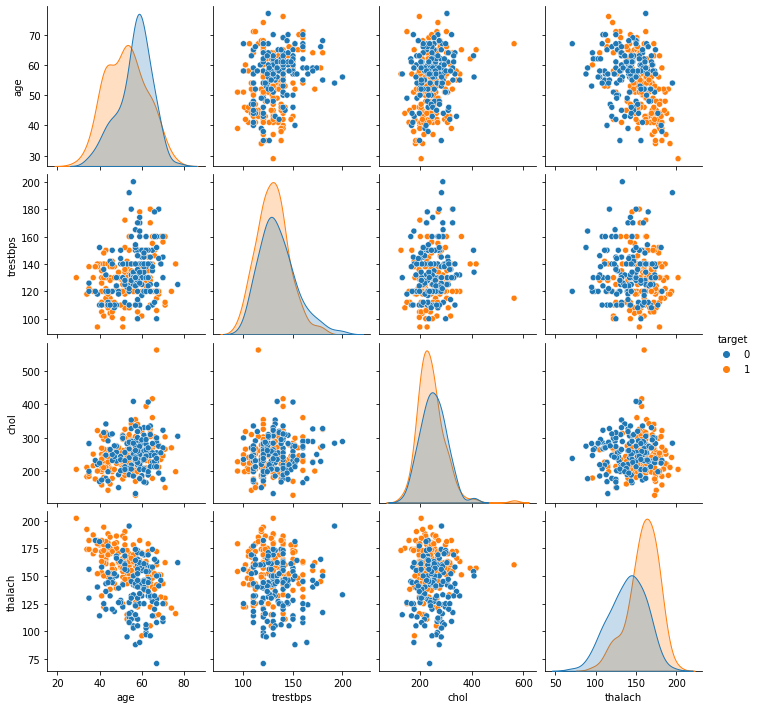

In [18]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target')

----
----

# Machine Learning

## Train | Test Split and Scaling

In [19]:
X = df.drop('target',axis=1)
y = df['target']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [22]:
scaler = StandardScaler()

In [23]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Modelo de Regressão Logística

**Vou criar um modelo de Regressão Logística e usar Cross-Validation para achar um bom valor para o hiperparâmetro C.**

*Aqui eu vou usar 'LogisticRegressionCV', mas em outras situações eu faço uso da combinação de 'LogisticRegression' e 'GridSearchCV'.*

In [24]:
from sklearn.linear_model import LogisticRegressionCV 

In [25]:
log_model = LogisticRegressionCV()
log_model.fit(scaled_X_train, y_train)

LogisticRegressionCV()

**Vendo os melhores parâmetros e, especificamente, o valor de C.** 

In [28]:
log_model.C_

array([0.04641589])

In [29]:
log_model.get_params()

{'Cs': 10,
 'class_weight': None,
 'cv': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

### Coeficientes

**Coeficientes obtidos pelo modelo:**

In [33]:
log_model.coef_

array([[-0.09621199, -0.39460154,  0.53534731, -0.13850191, -0.08830462,
         0.02487341,  0.08083826,  0.29914053, -0.33438151, -0.352386  ,
         0.25101033, -0.49735752, -0.37448551]])

**Visualização dos coefientes em gráfico de barras:**

In [34]:
coefs = pd.Series(index=X.columns, data=log_model.coef_[0])
coefs = coefs.sort_values(ascending=True)

<AxesSubplot:>

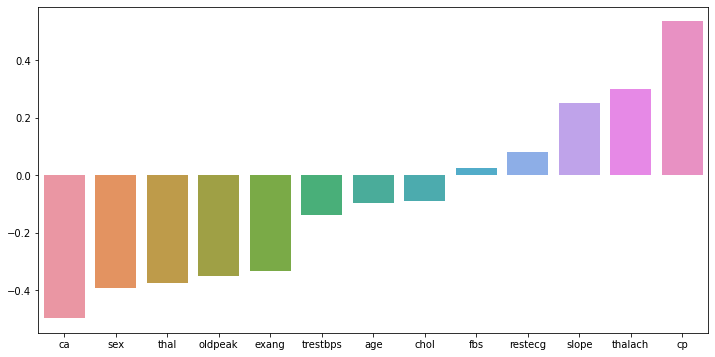

In [41]:
plt.figure(figsize=(12,6))
sns.barplot(x=coefs.index, y=coefs.values)

---------

## Avaliando a performance do modelo

**Vou avaliar o modelo no test set**

In [42]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report

In [43]:
y_pred = log_model.predict(scaled_X_test)

In [44]:
confusion_matrix(y_test, y_pred)

array([[12,  3],
       [ 2, 14]])

/home/madruga/Documents/Python/portfolio_nb/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


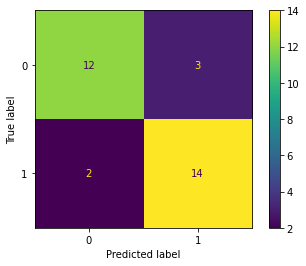

In [45]:
plot_confusion_matrix(log_model, scaled_X_test, y_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.82      0.88      0.85        16

    accuracy                           0.84        31
   macro avg       0.84      0.84      0.84        31
weighted avg       0.84      0.84      0.84        31



### Curvas de desempenho

In [47]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

/home/madruga/Documents/Python/portfolio_nb/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


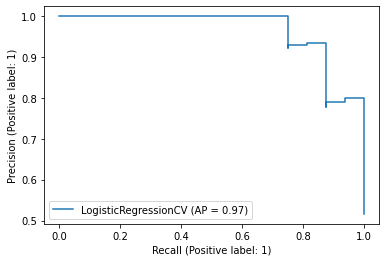

In [49]:
plot_precision_recall_curve(log_model, scaled_X_test, y_test)

/home/madruga/Documents/Python/portfolio_nb/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


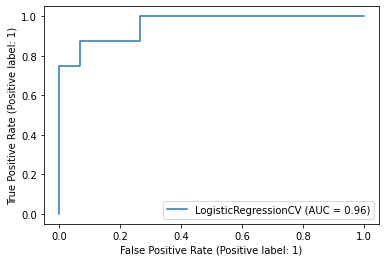

In [50]:
plot_roc_curve(log_model, scaled_X_test, y_test)

**Testando no primeiro paciente que havia ficado no test set:**

age | sex | cp | trestbps | chol | fbs | restecg | thalach | exang | oldpeak | slope | ca | thal
:-: | :-: | :-: |:-: |:-: |:-: |:-: |:-: |:-: |:-: |:-: |:-: |:-: |
54  | 1.0 | 0.0 | 122.0 | 286.0 | 0.0 | 0.0 | 116.0 | 1.0 | 3.2 | 1.0 | 2.0 | 2.0

**TASK: What does your model predict for this patient? Do they have heart disease? How "sure" is your model of this prediction?**

*For convience, we created an array of the features for the patient above*

In [58]:
patient = [[ 54. ,   1.0 ,   0.0 , 122. , 286. ,   0. ,   0. , 116. ,  1.0 ,
          3.2,   1.0 ,   2. ,   2. ]]

In [59]:
X_test.iloc[-1]

age          54.0
sex           1.0
cp            0.0
trestbps    122.0
chol        286.0
fbs           0.0
restecg       0.0
thalach     116.0
exang         1.0
oldpeak       3.2
slope         1.0
ca            2.0
thal          2.0
Name: 268, dtype: float64

In [60]:
y_test.iloc[-1]

0

In [61]:
log_model.predict(patient)

array([0])

In [62]:
log_model.predict_proba(patient)

array([[9.99999862e-01, 1.38455917e-07]])